<a href="https://colab.research.google.com/github/dlvvkfl88/CS-Knowldege/blob/main/ImageDataGenerator_%EA%B3%A0%EC%96%91%EC%9D%B4%EA%B0%95%EC%95%84%EC%A7%80%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B51112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Flatten, Dense,Dropout, GlobalAveragePooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 파일 다운로드
!wget

In [2]:
# 파일 다운로드

!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-08-02 14:15:56--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  91.7MB/s    in 0.7s    

2023-08-02 14:15:56 (91.7 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import shutil

if os.path.exists('/content/cats_and_dogs_filtered/'):    # 작업 디렉토리는 cats_and_dogs_filtered

    shutil.rmtree('/content/cats_and_dogs_filtered/')
    print('/content/cats_and_dogs_filtered/  is removed !!!')

In [4]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r') as target_file:

    target_file.extractall('/content/cats_and_dogs_filtered/')

#### IMAGEDATAGEERATOR 이용하여 데이터 불러옴

In [15]:
train_data_gen = ImageDataGenerator(rescale=1./255)

val_data_gen = ImageDataGenerator(rescale=1./255)

In [16]:
train_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train'
validation_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation'

In [17]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [29]:
# 이미 생성된 train_data_gen 객체를 사용하여 데이터 생성기를 생성합니다.
# train_data_gen은 이미 ImageDataGenerator 객체로 생성되었다고 가정합니다.
train_data_generator = train_data_gen.flow_from_directory(train_dir,
                                                         batch_size=2000,
                                                         color_mode='rgb',
                                                         shuffle=True,
                                                         target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                         class_mode='sparse')

print(train_data_generator.class_indices)
print(train_data_generator.num_classes)
print(train_data_generator.class_mode)

# 이미 생성된 val_data_gen 객체를 사용하여 데이터 생성기를 생성합니다.
# val_data_gen은 이미 ImageDataGenerator 객체로 생성되었다고 가정합니다.
validation_generator = val_data_gen.flow_from_directory(validation_dir,
                                                       batch_size=1000,
                                                       color_mode='rgb',
                                                       shuffle=True,
                                                       target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                       class_mode='sparse')


Found 2000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}
2
sparse
Found 1000 images belonging to 2 classes.


## 원본이미지 resizing 및 생성

In [30]:
for i in range(2):
  x_train,y_train = train_data_generator.next()
  print(x_train.shape,y_train.shape, y_train )


for i in range(2):
  x_train_1,y_train_1 = validation_generator.next()
  print(x_train_1.shape,y_train_1.shape, y_train_1 )

(2000, 224, 224, 3) (2000,) [1. 0. 1. ... 0. 0. 1.]
(2000, 224, 224, 3) (2000,) [1. 0. 0. ... 0. 0. 0.]
(1000, 224, 224, 3) (1000,) [1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0

### 데이터 1000개에서 4배 늘리기

In [26]:
augmentation_gen_train = ImageDataGenerator(rescale=1./255,
                         rotation_range=10,
                         shear_range=0.1,
                         horizontal_flip=True,
                         zoom_range=0.1, width_shift_range=0.1,
                         height_shift_range=0.1)

augmentation_gen_validation =ImageDataGenerator(rescale=1./255,
                         rotation_range=10,
                         shear_range=0.1,
                         horizontal_flip=True,
                         zoom_range=0.1, width_shift_range=0.1,
                         height_shift_range=0.1)





In [33]:
augmentation_generator_train = augmentation_gen_train.flow_from_directory(train_dir,
                                                         batch_size=2000,
                                                         color_mode='rgb',
                                                         shuffle=True,
                                                         target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                         class_mode='sparse')

augmentation_generator_validation = augmentation_gen_validation.flow_from_directory(validation_dir,
                                                         batch_size=1000,
                                                         color_mode='rgb',
                                                         shuffle=True,
                                                         target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                         class_mode='sparse')

print(augmentation_generator_train.class_indices)
print(augmentation_generator_train.num_classes)
print(augmentation_generator_train.class_mode)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}
2
sparse


## augmented data 생성

In [34]:
for i in range(2):
  x_aug,y_aug = augmentation_generator_train.next()
  print(x_aug.shape,y_aug.shape, y_aug )


for i in range(2):
  x_aug_1,y_aug_1 = validation_generator.next()
  print(x_aug_1.shape,y_aug.shape, y_aug )

(2000, 224, 224, 3) (2000,) [1. 1. 0. ... 0. 1. 1.]
(2000, 224, 224, 3) (2000,) [1. 0. 0. ... 0. 0. 0.]
(1000, 224, 224, 3) (2000,) [1. 0. 0. ... 0. 0. 0.]
(1000, 224, 224, 3) (2000,) [1. 0. 0. ... 0. 0. 0.]


## augmented data 도 train, val 합치기


In [36]:
import numpy as np

class_names = {'cats': 0, 'dogs': 1}

x_aug = np.concatenate((x_aug, x_aug_1))
y_aug = np.concatenate((y_aug, y_aug_1))


print('[before]', x_aug.shape, y_aug.shape)



[before] (3000, 224, 224, 3) (3000,)


# 위 부분 train,validation 합치기 2000, 1000개

In [31]:
import numpy as np

class_names = {'cats': 0, 'dogs': 1}

x_train = np.concatenate((x_train, x_train_1))
y_train = np.concatenate((y_train, y_train_1))


print('[before]', x_train.shape, y_train.shape)



[before] (3000, 224, 224, 3) (3000,)


## aug도 3000개 만들고 origin도 3000개 인거 오리지널에다 서로 합치기

In [37]:
x_train = np.concatenate((x_train, x_aug))
y_train = np.concatenate((y_train, y_aug))

print('[after]', x_train.shape, y_train.shape)

[after] (6000, 224, 224, 3) (6000,)


In [ ]:
## 두개다 합친거

In [40]:
y_train[1]

0.0

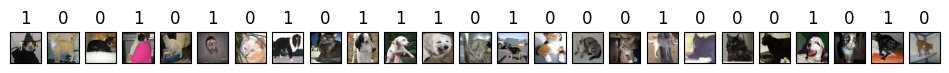

In [50]:
# import numpy as np

# AUGMENTATION_COUNT =2 # 2배만 늘리자

# class_names = {'cats': 0, 'dogs': 1}
# print('[before]', x_train.shape, y_train.shape)

# for i in range(AUGMENTATION_COUNT):
#   x_augmented, y_augmented = augmentation_generator.next()

#   print('augmented_shape=',x_augmented.shape, y_augmented.shape)

#   x_train = np.concatenate((x_train, x_augmented))
#   y_train = np.concatenate((y_train, y_augmented))

# print('[after]', x_train.shape, y_train.shape)

class_names = {'cats': 0, 'dogs': 1}


plt.figure(figsize=(12,10))

for i in range(25):

  plt.subplot(1,25, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(str((int(y_train[i]))))
  plt.imshow(x_train[i])

## 이제 6000개 train으로 퉁친것을 섞어서 train , test로 만들기

In [54]:
s = np.arange(x_train.shape[0]) # array([4627, 5075, 4519, ..., 5218, 1819, 3507])

np.random.shuffle(s)
x_train = x_train[s]

y_train = y_train[s]

In [57]:
ratio = 0.2 # train8 ,test2 로 나눌 예정

split_num = int(ratio*len(x_train))

print('split num => ', split_num)

x_test = x_train[0:split_num]
y_test = y_train[0:split_num]

x_train = x_train[split_num:]
y_train = y_train[split_num:]

split num =>  1200


## train, test 나누고 몇개인지 확인

In [58]:
print('x_train.shape = ', x_train.shape, ', y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape, ', y_test.shape = ', y_test.shape)

x_train.shape =  (4800, 224, 224, 3) , y_train.shape =  (4800,)
x_test.shape =  (1200, 224, 224, 3) , y_test.shape =  (1200,)


# Fine Tuning을 위한 Pre-trained model 정의 구축

In [51]:
base_model = MobileNet(weights='imagenet', include_top = False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

base_model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [59]:
class_nums = train_data_generator.num_classes # 2개라는 소리

model = Sequential()

model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(class_nums, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 16)                16400     
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 3,245,298
Trainable params: 3,223,410
No

# 모델 컴파일

In [60]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(2e-5), metrics=['accuracy'])

In [62]:
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss', # 모니터 기준 설정 (val loss)
                              patience=5,         # 5회 Epoch동안 개선되지 않는다면 종료
                             )

start_time = datetime.now()

hist = model.fit(x_train, y_train,
               batch_size=32, epochs=20,
               validation_data=(x_test, y_test),
              callbacks=[earlystopping])

end_time = datetime.now()

print('elapsed time = ', end_time-start_time)

Epoch 1/20


KeyboardInterrupt: ignored

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

## 테스트 이미지 확인 -- 여기서 부턴 이제
따로 강아지 고양이 이미지 가져온거 대략 10장정도 가져와서  실제 테스트 해보는곳

In [ ]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r') as target_file:

    target_file.extractall('/content/cats_and_dogs_filtered/')

In [ ]:
import cv2
import glob

test_img_list = []

test_img_name_list = glob.glob('/content/test_dir/*')

for i in range(len(test_img_name_list)):

    src_img = cv2.imread(test_img_name_list[i], cv2.IMREAD_COLOR)
    src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))

    dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

    dst_img = dst_img / 255.0

    test_img_list.append(dst_img)

print(test_img_name_list)
print(len(test_img_list))

In [ ]:
plt.figure(figsize=(6,4))

for i in range(len(test_img_list)):

    plt.subplot(2, 3, i+1)
    plt.axis('off')
    plt.imshow(test_img_list[i])

plt.show()

In [ ]:
for i in range(len(test_img_list)):

    print(test_img_list[i].shape)

In [ ]:
# predict 수행하기 위해 batch 차원 추가
import numpy as np

print(np.array(test_img_list).shape)

In [ ]:
# predict 실행

class_name = [ 'cat', 'dog' ]  # ImageDataGenerator 에서 cat=0, dog=1

pred = model.predict(np.array(test_img_list))

print(pred.shape)
print(pred)

In [ ]:
class_name = [ 'cat', 'dog' ]  # ImageDataGenerator 에서 cat=0, dog=1

plt.figure(figsize=(6,6))

for i in range(len(pred)):

    plt.subplot(2, 3, i+1)

    if pred[i] > 0.5:   # 정답이 1일 확률
        probility = pred[i]
        prediction = 'dog'
    else:               # 정답이 0일 확률
        probility = 1.0 - pred[i]
        prediction = 'cat'

    title_str = str('{0:0.2f}'.format(100*max(probility))) + ' %'
    plt.axis('off')
    plt.title(prediction+'='+title_str)
    plt.imshow(test_img_list[i])

plt.show()